In [39]:
import tensorflow as tf
from keras import layers, models
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras import regularizers
from keras import optimizers

# Building NN model

In [40]:
def leaky_relu(x):
    return tf.nn.leaky_relu(x, alpha=0.2)

input_shape = 300
output_shape = 3
model = models.Sequential()
model.add(layers.Dense(500, activation='sigmoid', input_shape=(300,)))
model.add(layers.Dense(250, activation='sigmoid'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(output_shape, activation='softmax')) 

sgd = optimizers.SGD(learning_rate=0.1)



In [41]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 500)               150500    
                                                                 
 dense_22 (Dense)            (None, 250)               125250    
                                                                 
 dropout_7 (Dropout)         (None, 250)               0         
                                                                 
 dense_23 (Dense)            (None, 3)                 753       
                                                                 
Total params: 276503 (1.05 MB)
Trainable params: 276503 (1.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Load Data

In [42]:
X_train = np.load('Data/Vectors/X_train.npy')
Y_train = np.load('Data/Vectors/Y_train.npy') #[:, :3]
X_test = np.load('Data/Vectors/X_test.npy')
Y_test = np.load('Data/Vectors/Y_test.npy') #[:, :3]
X_validation = np.load('Data/Vectors/X_validate.npy')
Y_validation = np.load('Data/Vectors/Y_validate.npy') #[:, :3]

# Train

In [48]:
history = model.fit(X_train, Y_train, epochs=50, batch_size=16, validation_data=(X_validation, Y_validation))

# Plotting the training and validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Adding title and labels to the plot
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/50
43748/43748 [==============================] - 185s 4ms/step - loss: 1.0634 - accuracy: 0.4298 - val_loss: 1.0640 - val_accuracy: 0.4306
Epoch 2/50
43748/43748 [==============================] - 262s 6ms/step - loss: 1.0630 - accuracy: 0.4300 - val_loss: 1.0640 - val_accuracy: 0.4297
Epoch 3/50
43748/43748 [==============================] - 244s 6ms/step - loss: 1.0626 - accuracy: 0.4305 - val_loss: 1.0620 - val_accuracy: 0.4305
Epoch 4/50
43748/43748 [==============================] - 263s 6ms/step - loss: 1.0624 - accuracy: 0.4304 - val_loss: 1.0655 - val_accuracy: 0.4306
Epoch 5/50
43748/43748 [==============================] - 102s 2ms/step - loss: 1.0623 - accuracy: 0.4311 - val_loss: 1.0690 - val_accuracy: 0.4296
Epoch 6/50
43748/43748 [==============================] - 92s 2ms/step - loss: 1.0623 - accuracy: 0.4312 - val_loss: 1.0625 - val_accuracy: 0.4320
Epoch 7/50
43748/43748 [==============================] - 95s 2ms/step - loss: 1.0623 - accuracy: 0.4310 - val_lo

KeyboardInterrupt: 

In [44]:
# Save the model
SAVE = False
if SAVE:
    model.save('my_model') 

# Evaluate

In [45]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

2735/2735 [==============================] - 4s 1ms/step - loss: 1.0624 - accuracy: 0.4330
Loss: 1.0623586177825928, Accuracy: 0.4329618811607361


# Confusion Matrix

2735/2735 [==============================] - 3s 1ms/step


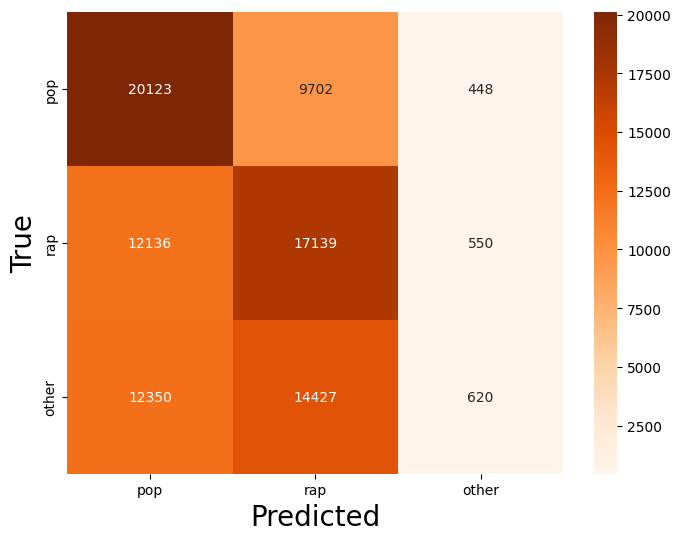

In [46]:

Y_pred = model.predict(X_test)

# Convert one-hot encoded vectors back to categorical values
Y_test_categorical = np.argmax(Y_test, axis=1)
Y_pred_categorical = np.argmax(Y_pred, axis=1)

# Create a confusion matrix
cm = confusion_matrix(Y_test_categorical, Y_pred_categorical)

# Visualize the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['pop','rap', 'other'], yticklabels=['pop', 'rap', 'other'])
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('True', fontsize=20)
plt.show()


Accuracy: 0.4329618835362021
Precision: [0.45109731 0.41530968 0.38318912]
Recall: [0.66471774 0.57465214 0.02263021]
F1-Score: [0.53745894 0.48215717 0.04273652]


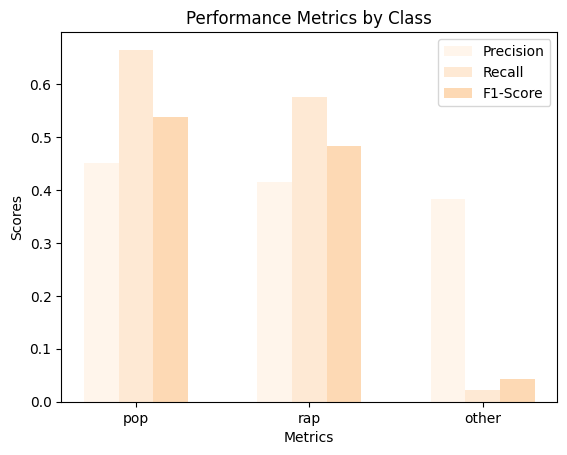

In [54]:
# Assuming you have predicted values stored in 'Y_pred_categorical' and true labels stored in 'Y_test_categorical'

# Accuracy
accuracy = accuracy_score(Y_test_categorical, Y_pred_categorical)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(Y_test_categorical, Y_pred_categorical, average=None)  # You can choose 'micro', 'macro', 'weighted', or 'samples' as per your requirement
print(f"Precision: {precision}")

# Recall
recall = recall_score(Y_test_categorical, Y_pred_categorical, average=None)  # You can choose 'micro', 'macro', 'weighted', or 'samples' as per your requirement
print(f"Recall: {recall}")

# F1-Score
f1 = f1_score(Y_test_categorical, Y_pred_categorical, average=None)  # You can choose 'micro', 'macro', 'weighted', or 'samples' as per your requirement
print(f"F1-Score: {f1}")



# Labels for the classes
classes = ['pop', 'rap', 'other']

num_colors = 10

# Create the colormap
cmap = plt.get_cmap('Oranges')

# Generate the array of colors
colors = [cmap(i / num_colors) for i in range(num_colors)]

# Plotting Precision, Recall, and F1-Score
x = np.arange(len(classes))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision', color=colors[5])
rects2 = ax.bar(x, recall, width, label='Recall', color=colors[8])
rects3 = ax.bar(x + width, f1, width, label='F1-Score', color=colors[9])

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Class')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

plt.show()
